In [1]:
import numpy as np
import zipfile as zp
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

data = sm.datasets.macrodata.load_pandas().data


In [2]:
data.set_index(pd.period_range('1959Q1', '2009Q3', freq='Q'), inplace = True)

In [3]:
data.columns

Index(['year', 'quarter', 'realgdp', 'realcons', 'realinv', 'realgovt',
       'realdpi', 'cpi', 'm1', 'tbilrate', 'unemp', 'pop', 'infl', 'realint'],
      dtype='object')

In [4]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

<AxesSubplot:>

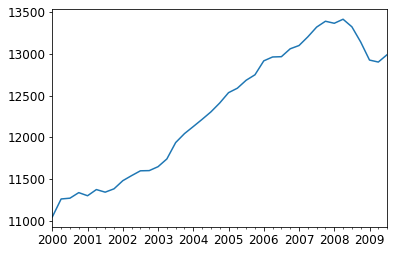

In [5]:
fig, ax = plt.subplots()
data['realgdp']["2000-03-31":].plot(ax=ax,fontsize=12)

In [6]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle,gdp_trend = hpfilter(data['realgdp'], lamb=1600)
gdp_segr = data[['realgdp']]
gdp_segr['cycle']= gdp_cycle
gdp_segr['trend'] = gdp_trend

gdp_segr

/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_15061/3026366470.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_segr['cycle']= gdp_cycle
/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_15061/3026366470.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_segr['trend'] = gdp_trend


,realgdp,cycle,trend
1959Q1,2710.349,39.511915,2670.837085
1959Q2,2778.801,80.088532,2698.712468
1959Q3,2775.488,48.875455,2726.612545
1959Q4,2785.204,30.591933,2754.612067
1960Q1,2847.699,64.882667,2782.816333
...,...,...,...
2008Q3,13324.600,102.018455,13222.581545
2008Q4,13141.920,-107.269472,13249.189472
2009Q1,12925.410,-349.047706,13274.457706
2009Q2,12901.504,-397.557073,13299.061073


In [13]:
gdp_cycle

1959Q1     39.511915
1959Q2     80.088532
1959Q3     48.875455
1959Q4     30.591933
1960Q1     64.882667
             ...    
2008Q3    102.018455
2008Q4   -107.269472
2009Q1   -349.047706
2009Q2   -397.557073
2009Q3   -333.115243
Freq: Q-DEC, Name: realgdp_cycle, Length: 203, dtype: float64

In [14]:
gdp_trend

1959Q1     2670.837085
1959Q2     2698.712468
1959Q3     2726.612545
1959Q4     2754.612067
1960Q1     2782.816333
              ...     
2008Q3    13222.581545
2008Q4    13249.189472
2009Q1    13274.457706
2009Q2    13299.061073
2009Q3    13323.456243
Freq: Q-DEC, Name: realgdp_trend, Length: 203, dtype: float64

In [15]:
da = data[['realgdp']]
da

,realgdp
1959Q1,2710.349
1959Q2,2778.801
1959Q3,2775.488
1959Q4,2785.204
1960Q1,2847.699
...,...
2008Q3,13324.600
2008Q4,13141.920
2009Q1,12925.410
2009Q2,12901.504


In [20]:
da.loc[:, 'cycle']= gdp_cycle
da

/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_15061/2253749216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da.loc[:, 'cycle']= gdp_cycle


,realgdp,cycle
1959Q1,2710.349,39.511915
1959Q2,2778.801,80.088532
1959Q3,2775.488,48.875455
1959Q4,2785.204,30.591933
1960Q1,2847.699,64.882667
...,...,...
2008Q3,13324.600,102.018455
2008Q4,13141.920,-107.269472
2009Q1,12925.410,-349.047706
2009Q2,12901.504,-397.557073


In [23]:
da.loc[:,'gdp_trend']=gdp_trend
da

/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_15061/2212018553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da.loc[:,'gdp_trend']=gdp_trend


,realgdp,cycle,gdp_trend
1959Q1,2710.349,39.511915,2670.837085
1959Q2,2778.801,80.088532,2698.712468
1959Q3,2775.488,48.875455,2726.612545
1959Q4,2785.204,30.591933,2754.612067
1960Q1,2847.699,64.882667,2782.816333
...,...,...,...
2008Q3,13324.600,102.018455,13222.581545
2008Q4,13141.920,-107.269472,13249.189472
2009Q1,12925.410,-349.047706,13274.457706
2009Q2,12901.504,-397.557073,13299.061073


<AxesSubplot:>

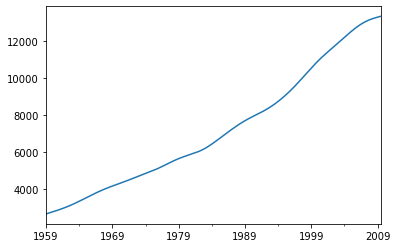

In [7]:
gdp_trend.plot()

<AxesSubplot:>

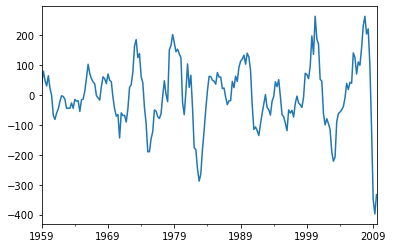

In [8]:
gdp_cycle.plot()

<AxesSubplot:>

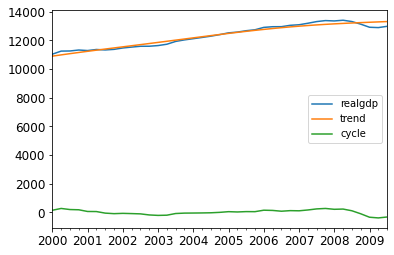

In [11]:
fig, ax = plt.subplots()

gdp_segr[['realgdp', 'trend', 'cycle']]["2000-03-31":].plot(ax=ax,fontsize=12)

<AxesSubplot:>

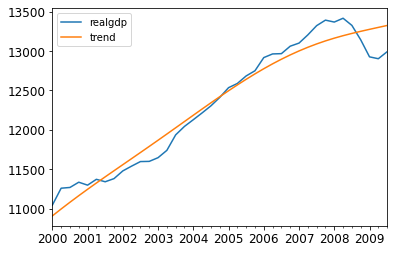

In [12]:
fig, ax = plt.subplots()
gdp_segr[['realgdp', 'trend']]["2000-03-31":].plot(ax=ax,fontsize=12)